### Import libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from bidi.algorithm import get_display
from arabic_reshaper import reshape

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

### Read Data

In [2]:
train = pd.read_csv('yektanet_train.csv')
train.head()

,category,description,text_content,title,h1,h2,url,domain,id
0,کتاب و ادبیات,"از شوبنده ها: جستجو معنی ""از شوبنده ها"" در فره...",معنی از شوبنده ها | جدول یاب از شوبنده ها 381,معنی از شوبنده ها | جدول یاب,معنی از شوبنده ها,از شوبنده ها در معادل ابجد,jadvalyab.ir/search?q=%D8%A7%D8%B2+%D8%B4%D9%8...,jadvalyab.ir,158
1,تجارت و اقتصاد,بیت‌کوین کش یک ارز مجازی مشهور است و بیت‌کوین ...,عکس بیت‌کوین کش برای پروفایل عکس و والپیپرهای ...,عکس بیت‌کوین کش برای پروفایل,عکس بیت‌کوین کش برای پروفایل,عکس بیت کوین با کیفیت 4K عکس ارزهای دیجیتال عک...,jowhareh.com/photo/%D8%B9%DA%A9%D8%B3-%D8%A8%D...,jowhareh.com,3268
2,سلامت,نوبت دهی دکتر مهناز عابدینی متخصص رادیولوژی و ...,دکتر مهناز عابدینی متخصص رادیولوژی و سونوگرافی...,دکتر مهناز عابدینی متخصص رادیولوژی و سونوگرافی...,دکتر مهناز عابدینی,آدرس و تلفن دکتر مهناز عابدینی نظرات و تجربیات...,doctor-yab.ir/Search/14773/%D8%AF%DA%A9%D8%AA%...,doctor-yab.ir,175
3,تکنولوژی و کامپبوتر,نرم افزار Geph برای اندروید یک پلت‌فرم چندسکوی...,دانلود تحریم‌گذر Geph برای اندروید خانه/اندروی...,دانلود تحریم‌گذر Geph برای اندروید,دانلود تحریم‌گذر Geph برای اندروید,دانلود نرم افزار Geph,palexe.site/dl/geph-android/,palexe.site,3402
4,تکنولوژی و کامپبوتر,سری جدید تلویزیون‌های هوشمند سامسونگ که با نام...,ترفندهای پرکاربرد تلویزیون‌‌های هوشمند سامسونگ...,ترفندهای پرکاربرد تلویزیون‌‌های هوشمند سامسونگ...,ترفندهای پرکاربرد تلویزیون‌‌های هوشمند سامسونگ,راه‌اندازی تلویزیون همگام‌سازی کنترل اتصال به ...,rokhdadeghtesadi.ir/43874/,rokhdadeghtesadi.ir,3811


In [3]:
test = pd.read_csv('yektanet_test.csv')
test.head()

,description,text_content,title,h1,h2,url,domain,id
0,پیام ناشناس یک ابزار رایگان برای ساخت چالش های...,پیام ناشناس / چالش دریافت پیام های ناشناس با ل...,پیام ناشناس / چالش دریافت پیام های ناشناس با ل...,NaN,پیام ناشناس / چالش دریافت پیام های ناشناس با ل...,abzarek.ir/service-p/msg/824757/,abzarek.ir,3291
1,اقتصادنیوز: سید امیر احمد علیه السلام ملقب به ...,حرم شاهچراغ شیراز در گذر زمان+تصاویر حرم شاهچر...,حرم شاهچراغ شیراز در گذر زمان+تصاویر,حرم شاهچراغ شیراز در گذر زمان+تصاویر,NaN,eghtesadnews.com/%D8%A8%D8%AE%D8%B4-%D8%A7%D8%...,eghtesadnews.com,5053
2,آخرین خبر های بین المللی و آخرین تحولات جهان، ...,آخرین خبر | زلنسکی پیام پوتین را دریافت کرد ✖...,آخرین خبر | زلنسکی پیام پوتین را دریافت کرد,زلنسکی پیام پوتین را دریافت کرد,NaN,akharinkhabar.ir/world/9332333/%D8%B2%D9%84%D9...,akharinkhabar.ir,564
3,آهنگ گاهی دریدن لازم نیست با صدای امیر تتلو با...,آهنگ گاهی دریدن لازم نیست امیر تتلو آهنگ گاهی ...,آهنگ گاهی دریدن لازم نیست امیر تتلو,آهنگ گاهی دریدن لازم نیست امیر تتلو,گاهی دریدن لازم نیست امیر تتلو,behmusic.com/music/%DA%AF%D8%A7%D9%87%DB%8C-%D...,behmusic.com,3607
4,کیهان با اشاره به حوادث و ناآرامیهای اخیر کشور...,انتقاد کیهان از امام جمعه اهل سنت زاهدان/ با ا...,انتقاد کیهان از امام جمعه اهل سنت زاهدان/ با ا...,انتقاد کیهان از امام جمعه اهل سنت زاهدان/ با ا...,برچسب‌ها نظر شما آخرین اخبار سیاسی ایران در بح...,khabaronline.ir/news/1688132/%D8%A7%D9%86%D8%A...,khabaronline.ir,2358


### Preprocsessing

In [4]:
# Determining the quantity of missing values in the data frame is essential.
# We have missing values in "description", "h1", "h2" and domain columns
# But there is nothing to worry about because we have dropped the domain column to prevent data leakage,
# filled the unavailable data with spaces and used other columns for prediction.
train.isnull().sum()

category           0
description       46
text_content       0
title              0
h1               358
h2              1439
url                0
domain             5
id                 0
dtype: int64

In [5]:
train.drop(['id','domain','url'], axis=1, inplace=True)
train = train.fillna("")

In [6]:
# Using all the text resources we have in the dataset!
train["text"] = train["title"] + " " + train["description"] + " " + train["text_content"] + " " + train["h1"] + " " + train["h2"]

In [7]:
# Let's assess the diversity and balance of our data.

valcount = pd.DataFrame(train.category.value_counts())
valcount.reset_index(inplace=True)
valcount.columns = ['category', 'count']
valcount

,category,count
0,سلامت,614
1,ورزش,514
2,حقوق و دولت و سیاست,486
3,هنر و سرگرمی,410
4,موسیقی,314
5,تکنولوژی و کامپبوتر,287
6,تجارت و اقتصاد,283
7,فیلم و سینما,239
8,خودرو,237
9,اجتماعی,209


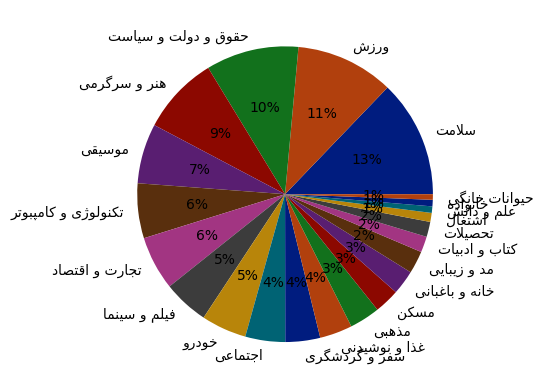

In [8]:
# and We use a pie chart to visualize and analyze our data
persian_labels = [get_display(reshape(label)) for label in valcount["category"]]

palette_color = seaborn.color_palette('dark')
plt.pie(valcount["count"], labels=persian_labels, colors=palette_color, autopct='%.0f%%')

plt.show()

In [9]:
# For the first preprocessing step, we need to encode the target column.
# I have chosen to use LabelEncoding.

encoder = LabelEncoder()
train["category"] = encoder.fit_transform(train["category"])

In [10]:
# Now, we count our Number of unique targets.
unique_targets = np.unique(train["category"])
num_unique_targets = len(unique_targets)
print("Number of unique targets:", num_unique_targets)

Number of unique targets: 22


In [11]:
# CountVectorizer, TfidfTransformer, and TfidfVectorizer are frequency word embedding techniques
# used to convert text into a numeric form that can be consumed by machine learning models.
# Machine learning models cannot be trained on raw text with variable length.

# Assuming 'text' is the column we want to process
corpus = train[["text"]]['text'].tolist()

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the corpus to get word counts
word_counts = vectorizer.fit_transform(corpus)

# Create a TfidfTransformer object
tfidf_transformer = TfidfTransformer()

# Fit and transform the word counts to get TF-IDF values
tfidf_values = tfidf_transformer.fit_transform(word_counts)

# Now 'tfidf_values' contains the TF-IDF representation of our text data
print(tfidf_values.shape)

(4789, 118607)


In [12]:
# As you can see, our data is imbalanced, so we need to balance it before training the model.
# There are various methods for balancing data such as random-over-sampling, random-under-sampling, SMOTE, NearMiss, etc.
# In this situation, I use SMOTE

X = train[["text"]]
y = train["category"]

In [13]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(tfidf_values, y)

### Training Phase

In [14]:
# First, we split the data
X_train, X_val, y_train, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Define a list of classification models
models = [
    LogisticRegression(max_iter=200),
    LinearSVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    KNeighborsClassifier(),
]

# Train and evaluate each model
results = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')

    results.append({
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Print the results
results_df = pd.DataFrame(results)
print(results_df)

                    Model  Accuracy  Precision    Recall  F1-Score
0      LogisticRegression  0.944115   0.946159  0.944115  0.944383
1               LinearSVC  0.967802   0.967932  0.967802  0.967645
2  DecisionTreeClassifier  0.855662   0.855326  0.855662  0.854731
3  RandomForestClassifier  0.935603   0.937822  0.935603  0.935868
4    KNeighborsClassifier  0.878979   0.889758  0.878979  0.872444


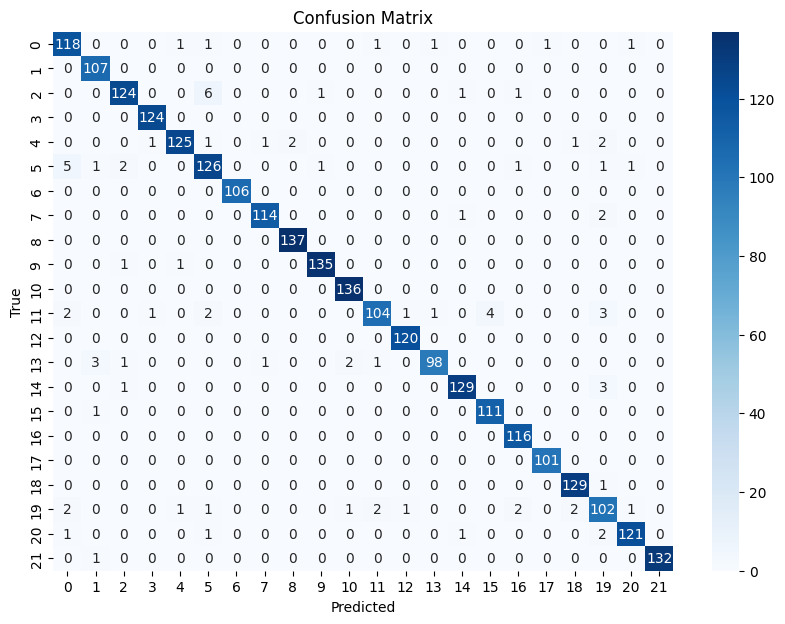

In [35]:
# As you can see the "LinearSVC" gives us a 96% F1-Score and this is GREAT!
best_model = LinearSVC()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_val)

# plot confusion matrix
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Prediction

In [36]:
# For last step we predict test DataFrame

test = test.fillna("")
test["text"] = test["title"] + " " + test["description"] + " " + test["text_content"] + " " + test["h1"] + " " + test["h2"]
corpus_test = test['text'].tolist()
word_counts_test = vectorizer.transform(corpus_test)
tfidf_values_test = tfidf_transformer.transform(word_counts_test)

y_pred_test = best_model.predict(tfidf_values_test)
y_pred_test_labels = encoder.inverse_transform(y_pred_test)
submission = pd.DataFrame({'category': y_pred_test_labels})
submission

,category
0,هنر و سرگرمی
1,حقوق و دولت و سیاست
2,حقوق و دولت و سیاست
3,موسیقی
4,حقوق و دولت و سیاست
...,...
412,سلامت
413,سلامت
414,موسیقی
415,هنر و سرگرمی
